In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [14]:
## Meta Data
# print(algerian_forest_fires.metadata) 


In [15]:
df = pd.read_csv('Algerian Forest Fires.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   244 non-null    int64  
 1   region       244 non-null    object 
 2   day          244 non-null    int64  
 3   month        244 non-null    int64  
 4   year         244 non-null    int64  
 5   Temperature  244 non-null    int64  
 6    RH          244 non-null    int64  
 7    Ws          244 non-null    int64  
 8   Rain         244 non-null    float64
 9   FFMC         244 non-null    float64
 10  DMC          244 non-null    float64
 11  DC           244 non-null    object 
 12  ISI          244 non-null    float64
 13  BUI          244 non-null    float64
 14  FWI          244 non-null    object 
 15  Classes      243 non-null    object 
dtypes: float64(5), int64(7), object(4)
memory usage: 30.6+ KB


In [17]:
# Algerian Forest Fires

In [18]:
df.columns = df.columns.str.strip()

In [19]:
df.columns

Index(['Unnamed: 0', 'region', 'day', 'month', 'year', 'Temperature', 'RH',
       'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   244 non-null    int64  
 1   region       244 non-null    object 
 2   day          244 non-null    int64  
 3   month        244 non-null    int64  
 4   year         244 non-null    int64  
 5   Temperature  244 non-null    int64  
 6   RH           244 non-null    int64  
 7   Ws           244 non-null    int64  
 8   Rain         244 non-null    float64
 9   FFMC         244 non-null    float64
 10  DMC          244 non-null    float64
 11  DC           244 non-null    object 
 12  ISI          244 non-null    float64
 13  BUI          244 non-null    float64
 14  FWI          244 non-null    object 
 15  Classes      243 non-null    object 
dtypes: float64(5), int64(7), object(4)
memory usage: 30.6+ KB


In [21]:
df.isnull().sum()

Unnamed: 0     0
region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df

,Unnamed: 0,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,Sidi-Bel Abbes,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,240,Sidi-Bel Abbes,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,241,Sidi-Bel Abbes,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,242,Sidi-Bel Abbes,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [24]:
encoder = LabelEncoder()
df['region'] = encoder.fit_transform(df['region'])

In [25]:
df

,Unnamed: 0,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,2,0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,0,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,4,0,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,1,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,240,1,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,241,1,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,242,1,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [26]:
df

,Unnamed: 0,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,2,0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,0,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,4,0,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,1,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,240,1,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,241,1,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,242,1,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   region       243 non-null    int64  
 2   day          243 non-null    int64  
 3   month        243 non-null    int64  
 4   year         243 non-null    int64  
 5   Temperature  243 non-null    int64  
 6   RH           243 non-null    int64  
 7   Ws           243 non-null    int64  
 8   Rain         243 non-null    float64
 9   FFMC         243 non-null    float64
 10  DMC          243 non-null    float64
 11  DC           243 non-null    object 
 12  ISI          243 non-null    float64
 13  BUI          243 non-null    float64
 14  FWI          243 non-null    object 
 15  Classes      243 non-null    object 
dtypes: float64(5), int64(8), object(3)
memory usage: 32.3+ KB


In [28]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '14.1', '9.1', '13', '17.3', '30',
       '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4', '15.2',
  

In [29]:
df['FWI']=pd.to_numeric(df['FWI'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   region       243 non-null    int64  
 2   day          243 non-null    int64  
 3   month        243 non-null    int64  
 4   year         243 non-null    int64  
 5   Temperature  243 non-null    int64  
 6   RH           243 non-null    int64  
 7   Ws           243 non-null    int64  
 8   Rain         243 non-null    float64
 9   FFMC         243 non-null    float64
 10  DMC          243 non-null    float64
 11  DC           243 non-null    object 
 12  ISI          243 non-null    float64
 13  BUI          243 non-null    float64
 14  FWI          243 non-null    float64
 15  Classes      243 non-null    object 
dtypes: float64(6), int64(8), object(2)
memory usage: 32.3+ KB


In [31]:
df.DC.unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [32]:
df['DC']=pd.to_numeric(df['DC'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   region       243 non-null    int64  
 2   day          243 non-null    int64  
 3   month        243 non-null    int64  
 4   year         243 non-null    int64  
 5   Temperature  243 non-null    int64  
 6   RH           243 non-null    int64  
 7   Ws           243 non-null    int64  
 8   Rain         243 non-null    float64
 9   FFMC         243 non-null    float64
 10  DMC          243 non-null    float64
 11  DC           243 non-null    float64
 12  ISI          243 non-null    float64
 13  BUI          243 non-null    float64
 14  FWI          243 non-null    float64
 15  Classes      243 non-null    object 
dtypes: float64(7), int64(8), object(1)
memory usage: 32.3+ KB


In [34]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [35]:
df['Classes']=df['Classes'].str.strip()

In [36]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [37]:
df['Classes_encoded'] = encoder.fit_transform(df['Classes'])

In [38]:
df.head(2)

,Unnamed: 0,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes_encoded
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1


In [39]:
## For Not Fire -----------> 1
## For Fire ---------------> 0

In [40]:
df.drop(['Classes'],axis=1,inplace=True)

In [41]:
df.head(2)

,Unnamed: 0,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_encoded
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       243 non-null    int64  
 1   region           243 non-null    int64  
 2   day              243 non-null    int64  
 3   month            243 non-null    int64  
 4   year             243 non-null    int64  
 5   Temperature      243 non-null    int64  
 6   RH               243 non-null    int64  
 7   Ws               243 non-null    int64  
 8   Rain             243 non-null    float64
 9   FFMC             243 non-null    float64
 10  DMC              243 non-null    float64
 11  DC               243 non-null    float64
 12  ISI              243 non-null    float64
 13  BUI              243 non-null    float64
 14  FWI              243 non-null    float64
 15  Classes_encoded  243 non-null    int64  
dtypes: float64(7), int64(9)
memory usage: 32.3 KB


In [43]:
df

,Unnamed: 0,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_encoded
0,0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,2,0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,3,0,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,4,0,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,1,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,240,1,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,241,1,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,242,1,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [44]:
# df.to_csv('Cleaned_Algerian_Forest_Fires.csv',index=False)

In [45]:



### EDA

In [46]:
df.drop(['year'],axis=1,inplace=True)

In [47]:
df.head(2)

,Unnamed: 0,region,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_encoded
0,0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,1,0,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1


In [48]:
Classes_map = {1:0,0:1}
df['Classes_encoded'] = df['Classes_encoded'].map(Classes_map) ## 1----->Fire 0----->Not Fire

In [49]:
import matplotlib.pyplot as plt

<Axes: >

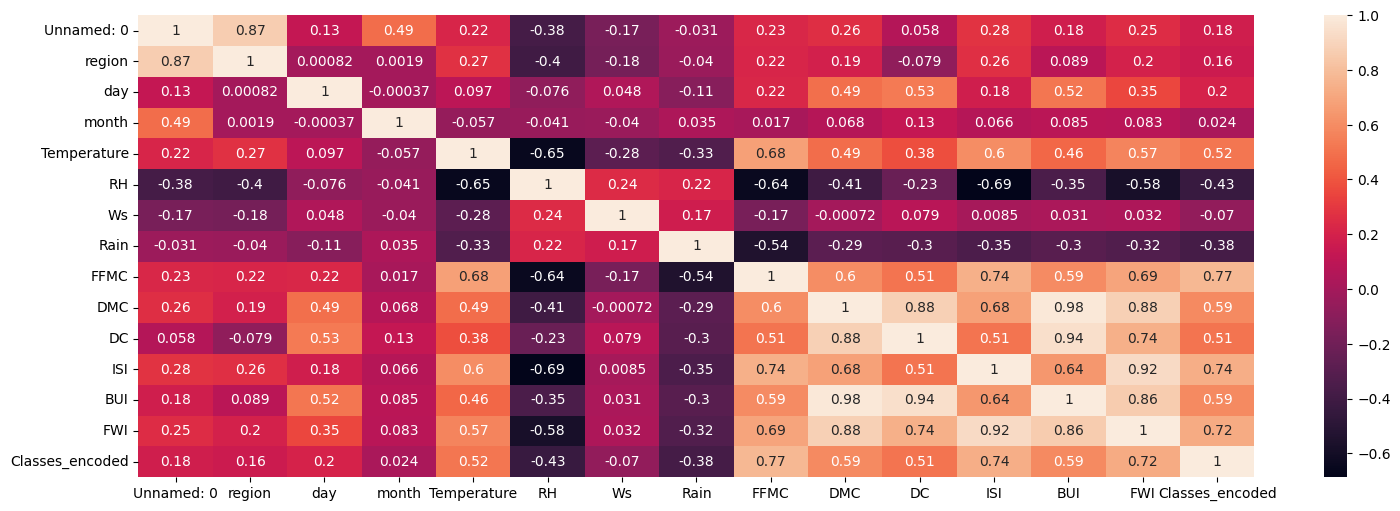

In [50]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)

In [2]:
# df = pd.read_csv('Cleaned_Algerian_Forest_Fires.csv')

In [51]:
df

,Unnamed: 0,region,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_encoded
0,0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,1,0,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,2,0,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,3,0,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,4,0,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,1,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,240,1,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,241,1,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,242,1,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [52]:
Classes_map = {1:0,0:1}
df['Classes_encoded'] = df['Classes_encoded'].map(Classes_map) ## 1

In [53]:
df

,Unnamed: 0,region,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_encoded
0,0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,1,0,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,2,0,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,3,0,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,4,0,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,1,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,240,1,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,241,1,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,242,1,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [59]:
df.to_csv('Cleaned_Algerian_Forest_Fires.csv')

In [57]:
Classes_map = {1:0,0:1}
df['Classes_encoded'] = df['Classes_encoded'].map(Classes_map) ## 1----->Fire 0----->Not Fire

In [ ]:
df = pd.read_csv('"Algerian Forest Fires.csv